## 数据分析代码

### 以下代码用于展示原始数据

In [28]:
# plot all vars for one subject
from numpy import array
from numpy import dstack
from numpy import unique
from pandas import read_csv
from matplotlib import pyplot

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	path = "/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/"
	filepath = path + prefix + group + '/Inertial_Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(path + prefix + group + '/y_'+group+'.txt')
	return X, y

# get all data for one subject
def data_for_subject(X, y, sub_map, sub_id):
	#X.shape: (7352, 128, 9)
	print("X.shape:",X.shape)
	# get row indexes for the subject id
	ix = [i for i in range(len(sub_map)) if sub_map[i]==sub_id]
	# return the selected samples
	return X[ix, :, :], y[ix]

# convert a series of windows to a 1D list
def to_series(windows):
	series = list()
	for window in windows:
		# remove the overlap from the window
		half = int(len(window) / 2) - 1
		for value in window[-half:]:
			series.append(value)
	return series

#### 数据时序图展示

/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_1949/3934217497.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_1949/3934217497.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_1949/3934217497.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = read_csv(filepath, header=None, delim_whitespace=True)
/var/folders/_5/94fjqpyj5nx_b6zfm7yv0x6r0000gn/T/ipykernel_1949/3934217497.py:10: FutureWarning: The 'delim_whitespace' k

X.shape: (7352, 128, 9)
(347, 128, 9) (347, 1)


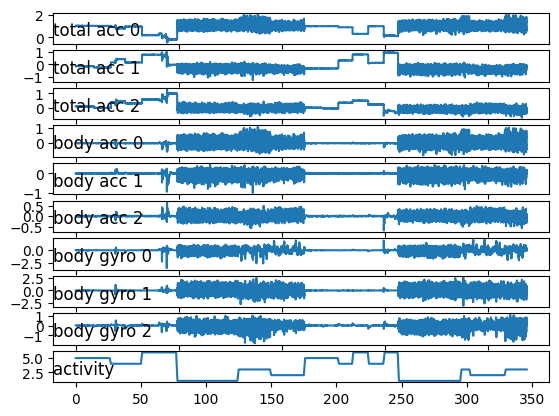

In [29]:

# plot the data for one subject
def plot_subject(X, y):
	pyplot.figure()
	# determine the total number of plots
	n, off = X.shape[2] + 1, 0
	# plot total acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('total acc '+str(i), y=0, loc='left')
		off += 1
	# plot body acc
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body acc '+str(i), y=0, loc='left')
		off += 1
	# plot body gyro
	for i in range(3):
		pyplot.subplot(n, 1, off+1)
		pyplot.plot(to_series(X[:, :, off]))
		pyplot.title('body gyro '+str(i), y=0, loc='left')
		off += 1
	# plot activities
	pyplot.subplot(n, 1, n)
	pyplot.plot(y)
	pyplot.title('activity', y=0, loc='left')
	pyplot.show()

# load data
trainX, trainy = load_dataset('train', 'UCI_HAR_Dataset/')
# load mapping of rows to subjects
sub_map = load_file('/Users/wangxiaoxuan/Desktop/human+activity+recognition+using+smartphones/UCI_HAR_Dataset/train/subject_train.txt')
train_subjects = unique(sub_map)
# get the data for one subject
sub_id = train_subjects[0]
#print("sub_id:",sub_id)
subX, suby = data_for_subject(trainX, trainy, sub_map, sub_id)
#print("subX:",subX)
#print("suby:"),suby
print(subX.shape, suby.shape)
# plot data for subject
plot_subject(subX, suby)

### 样本数据分布

In [32]:
import matplotlib.pyplot as plt
# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
  # remove overlap
  cut = int(trainX.shape[1] / 2)
  longX = trainX[:, -cut:, :]
  # flatten windows
  longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
  print(longX.shape)
  plt.figure()
  xaxis = None
  for i in range(longX.shape[1]):
    ax = plt.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
    ax.set_xlim(-1, 1)
    if i == 0:
      xaxis = ax
    plt.hist(longX[:, i], bins=100)
    plt.show()

(470528, 9)


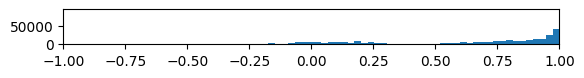

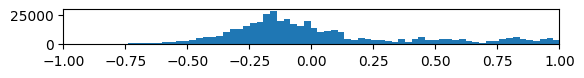

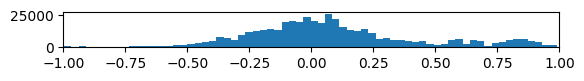

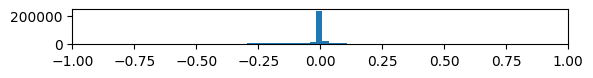

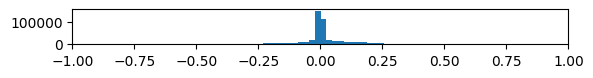

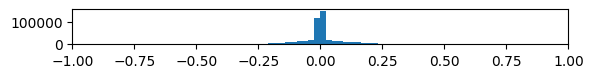

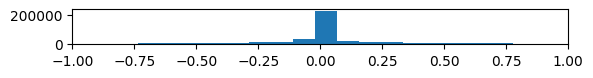

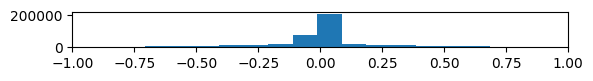

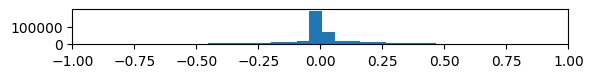

In [33]:
plot_variable_distributions(trainX)

We can say that this is close to Gaussian distribution and thus, apply the standardization of the data.